
# Homework 11_ 2022- First Order Autocorrelation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math

In [35]:
n = 2**13 # number of grid points
T_width = 12.5e-12 # time width
dt = T_width / n
T = np.arange(-n/2,n/2,1)*dt
V = 2*np.pi*np.linspace(-1/2,1/2,n)*(1/dt)

In [36]:
c = 299792458 # speed of light m/s
wl = 835e-9 # wavelength m
w0 = 2*np.pi*c / wl # frequency in Hertz
w = V + w0 # frequency axis
WLaxis = 2*np.pi*c / w

In [37]:
peak_power = 1 # peak power
t0 = 28.4e-15 # pulse duration
A = (np.sqrt(peak_power)*(1/np.cosh(T/t0*1.76)))

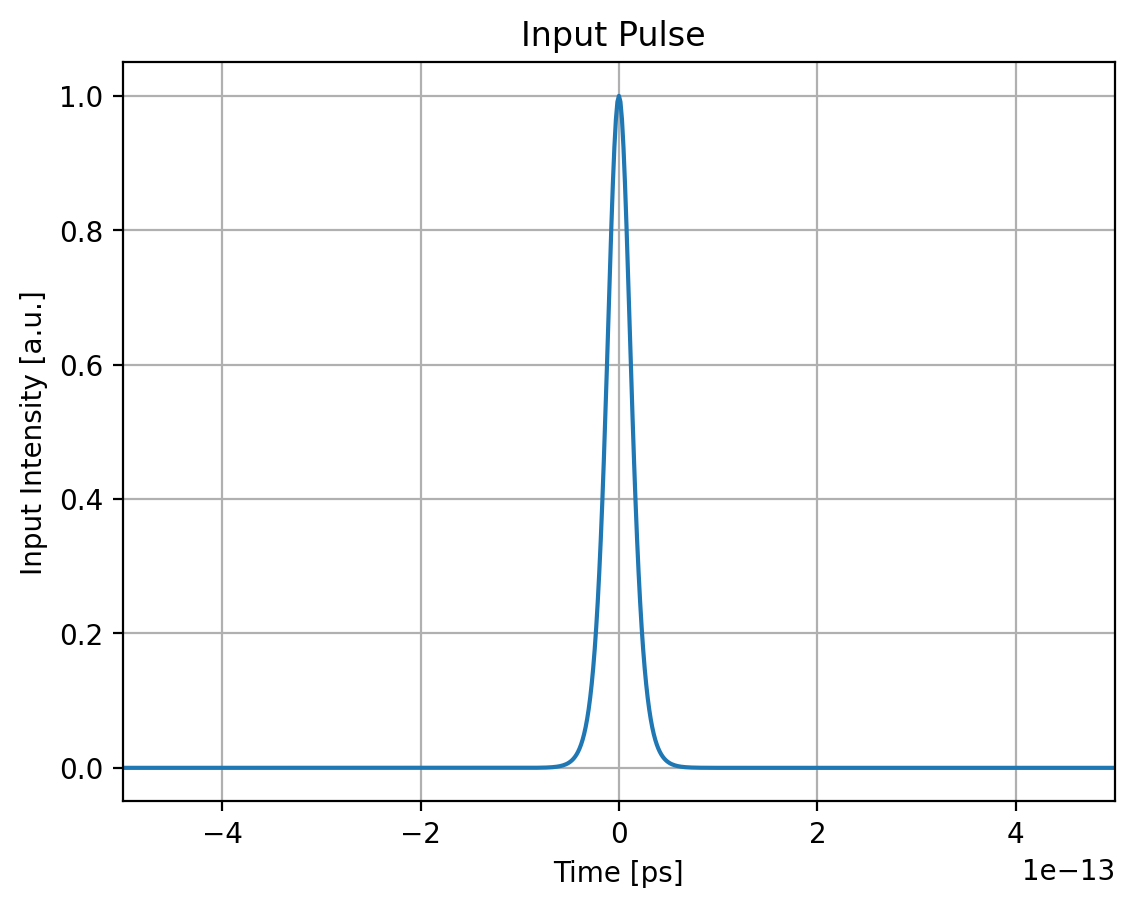

In [38]:
plt.figure(dpi=200)
plt.plot(T, np.abs(A)**2)
plt.ylabel('Input Intensity [a.u.]')
plt.xlim([-500e-15,500e-15])
plt.xlabel('Time [ps]')
plt.title('Input Pulse ')
plt.grid()
plt.show()

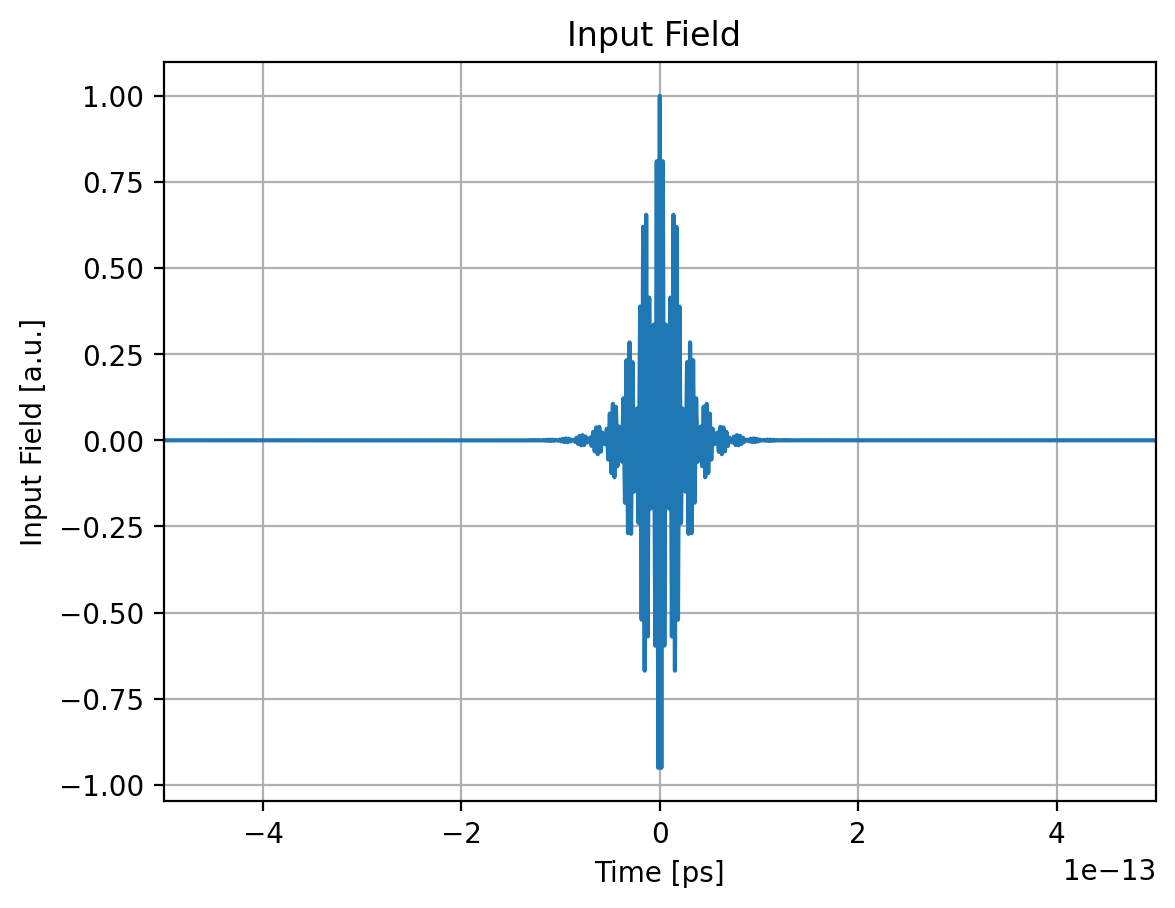

In [39]:
plt.figure(dpi=200)
plt.plot(T, A*np.cos(w0*T))
plt.ylabel('Input Field [a.u.]')
plt.xlim([-500e-15,500e-15])
plt.xlabel('Time [ps]')
plt.title('Input Field ')
plt.grid()
plt.show()

In [40]:
def hl_envelopes_idx(s, dmin=1, dmax=1, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    

    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]


    # global max of dmax-chunks of locals max 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global min of dmin-chunks of locals min 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax



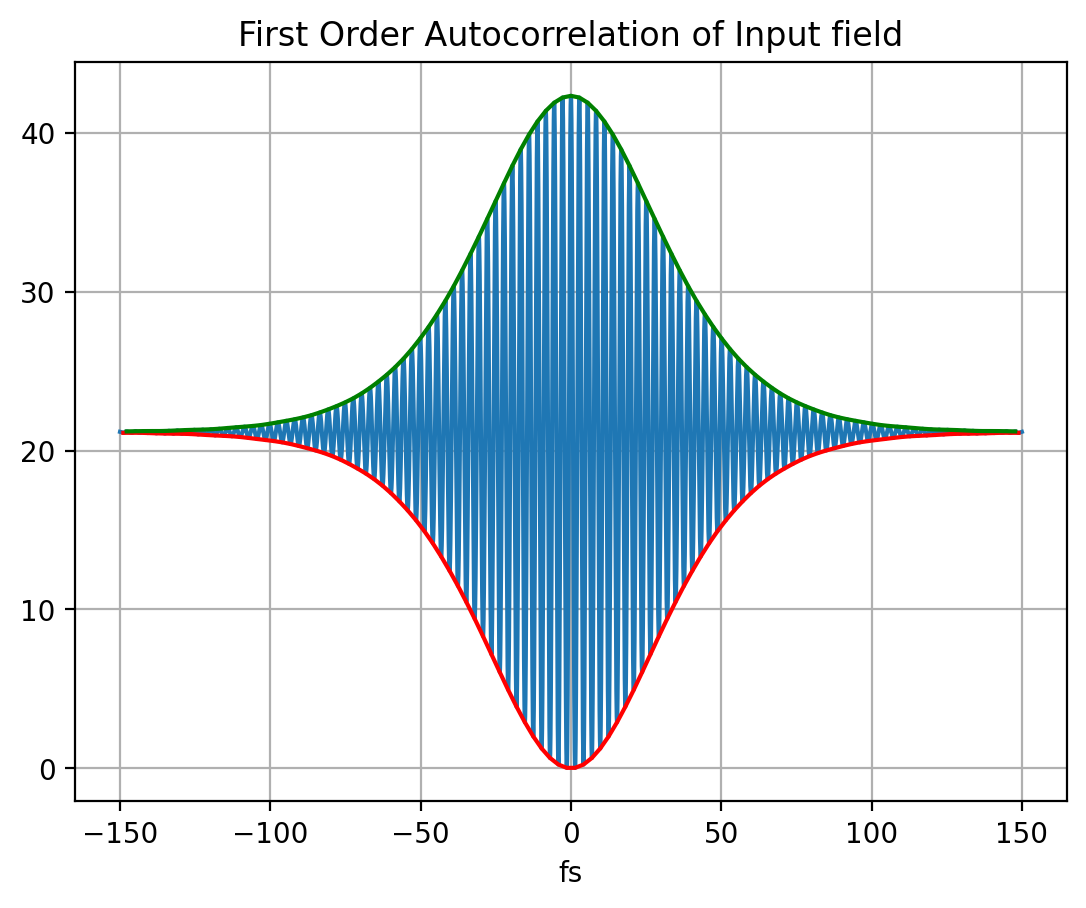

In [41]:
etots=[]

E_t0 = A*np.cos(w0*T)

tt= np.linspace(-150,150,10000)

for ii in tt:
    tau=ii*1e-15
    A_temp = (np.sqrt(peak_power)*(1/np.cosh((T+tau)/t0*1.76)))

    E_tau= A_temp*np.cos(w0*(T+tau))
    
    E_tot = np.sum(np.abs(E_t0+E_tau)**2)
    etots.append(E_tot)
    

high_idx, low_idx = hl_envelopes_idx(np.array(etots))
etots=np.array(etots)
plt.figure(dpi=200)
plt.title('First Order Autocorrelation of Input field')
plt.plot(tt,etots)
plt.plot(tt[high_idx], etots[high_idx], 'r', label='low')
plt.plot(tt[low_idx], etots[low_idx], 'g', label='high')
plt.xlabel('fs')
plt.grid()
plt.show()


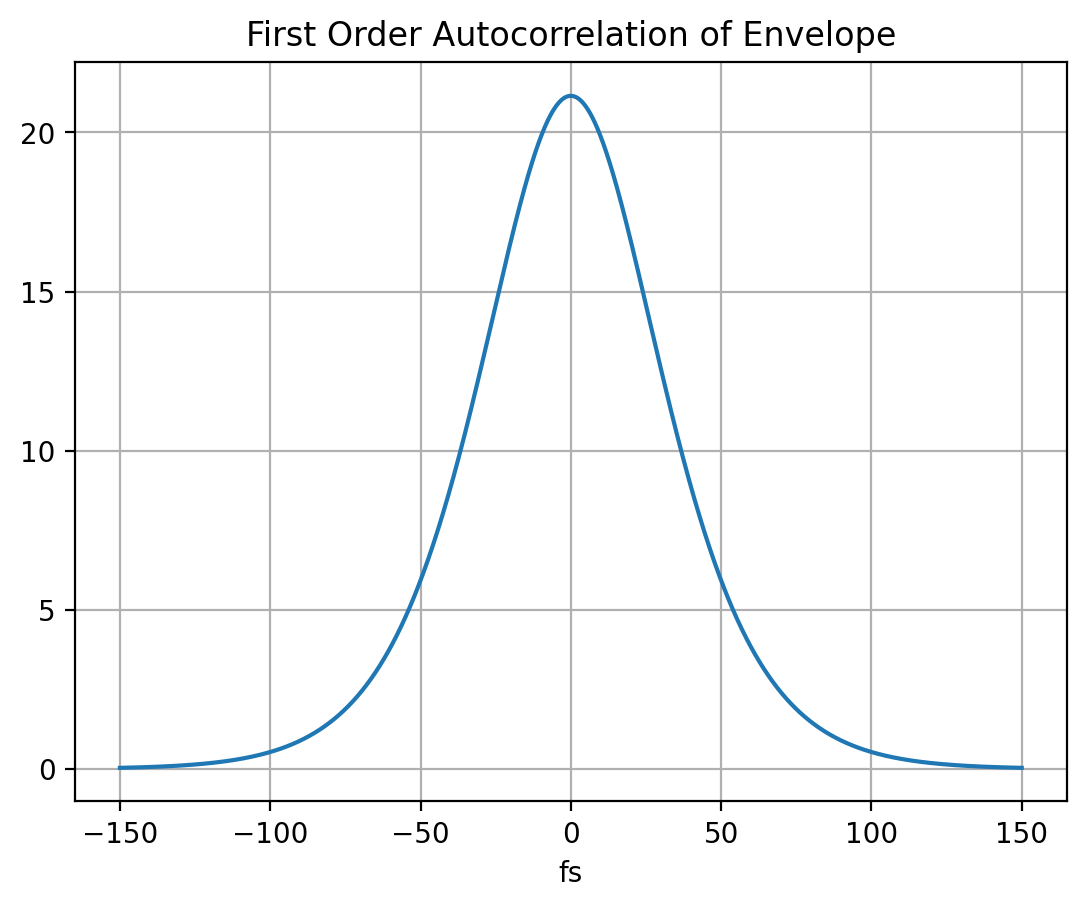

In [43]:
# Auto Correlation of Envelope 
etots=[]

for ii in tt:
    

    tau=ii*1.e-15
    A_temp = (np.sqrt(peak_power)*(1/np.cosh((T+tau)/t0*1.76)))
 
    E_tot = np.sum(np.abs(A*A_temp))
    etots.append(E_tot)
    

etots=np.array(etots)
plt.figure(dpi=200)
plt.title('First Order Autocorrelation of Envelope')
plt.plot(tt,etots)

plt.xlabel('fs')
plt.grid()
plt.show()

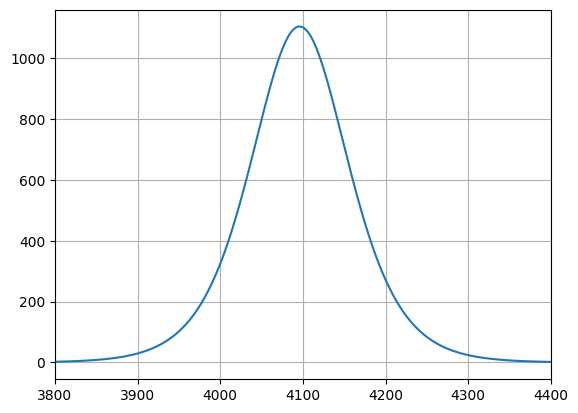

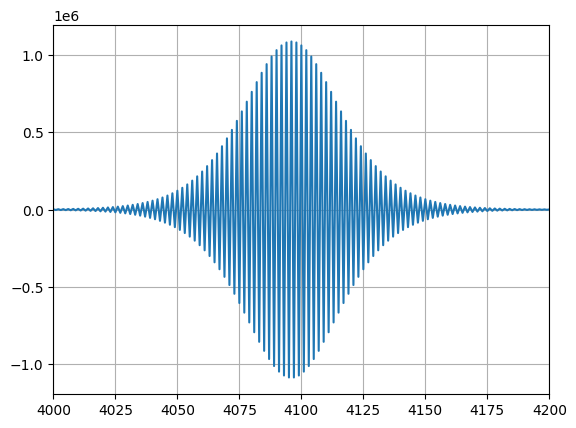

In [49]:
A_ft = np.fft.fft(A)
A_ft = np.fft.fftshift(A_ft)
A_ft_abs2 = np.abs(A_ft)**2

plt.plot(A_ft_abs2)
plt.xlim(3800,4400)
plt.grid()
plt.show()


plt.plot((2*np.pi)*np.fft.fftshift(np.fft.fft((A_ft_abs2))))
plt.xlim(4000,4200)
plt.grid()
plt.show()
